# Análise preditiva do valor de imóveis na cidade de São Paulo

# Importar bibliotecas

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, r2_score
%matplotlib inline

# Carregar dados

Ler arquivo "dados_imoveis.csv"

In [2]:
dados = pd.read_csv('dados_imoveis.csv')
dados.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


In [3]:
dados.shape

(10008, 8)

# Análise Exploratória

In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


## Tratar dados da coluna "Valor"

In [5]:
dados['Valor']

0                                R$ 7.000.000
1                                R$ 3.700.000
2                                  R$ 380.000
3                                  R$ 685.000
4                                  R$ 540.000
                         ...                 
10003                              R$ 665.000
10004                            R$ 2.300.000
10005                            R$ 1.050.000
10006    R$ 2.200\n                      /Mês
10007                              R$ 270.000
Name: Valor, Length: 10008, dtype: object

In [6]:
dados['Valor'].str.split(expand=True)

,0,1,2
0,R$,7.000.000,None
1,R$,3.700.000,None
2,R$,380.000,None
3,R$,685.000,None
4,R$,540.000,None
...,...,...,...
10003,R$,665.000,None
10004,R$,2.300.000,None
10005,R$,1.050.000,None
10006,R$,2.200,/Mês


In [7]:
dados['Valor'].str.split(expand=True)[0].unique(), dados['Valor'].str.split(expand=True)[2].unique()

(array(['R$'], dtype=object),
 array([None, '/Mês', '/Ano', '/Dia'], dtype=object))

In [8]:
dados[['Moeda','Value','Tipo']] = dados['Valor'].str.split(expand=True)

In [9]:
dados.head(3)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Value,Tipo
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None


In [10]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
 8   Moeda      10008 non-null  object
 9   Value      10008 non-null  object
 10  Tipo       852 non-null    object
dtypes: int64(4), object(7)
memory usage: 860.2+ KB


### Alterar o tipo da variável "Value" para numérico (float)

In [11]:
dados['Value'].str.replace('.', '', regex=True).astype(float)

0        7000000.0
1        3700000.0
2         380000.0
3         685000.0
4         540000.0
           ...    
10003     665000.0
10004    2300000.0
10005    1050000.0
10006       2200.0
10007     270000.0
Name: Value, Length: 10008, dtype: float64

In [12]:
dados['Value'] = dados['Value'].str.replace('.', '', regex=True).astype(float)

In [13]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Rua        6574 non-null   object 
 1   Bairro     9996 non-null   object 
 2   Cidade     10008 non-null  object 
 3   Metragem   10008 non-null  int64  
 4   Quartos    10008 non-null  int64  
 5   Banheiros  10008 non-null  int64  
 6   Vagas      10008 non-null  int64  
 7   Valor      10008 non-null  object 
 8   Moeda      10008 non-null  object 
 9   Value      10008 non-null  float64
 10  Tipo       852 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 860.2+ KB


### Considerando que para a variável "Tipo" as observações '/Mês', '/Ano' e '/Dia' são para imóveis de locação e não para venda, nos interessa apenas onde "Tipo" é igual a None.

In [14]:
dados.loc[dados['Tipo'].isnull()]

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Value,Tipo
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7000000.0,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3700000.0,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380000.0,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685000.0,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540000.0,None
...,...,...,...,...,...,...,...,...,...,...,...
10002,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,R$,1500000.0,None
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,R$,665000.0,None
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,R$,2300000.0,None
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,R$,1050000.0,None


In [15]:
dados_venda = dados.loc[dados['Tipo'].isnull()].copy(deep=True)

In [16]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
dados_venda.describe()

,Metragem,Quartos,Banheiros,Vagas,Value
count,9156.00,9156.00,9156.00,9156.00,9156.00
mean,434.42,3.45,3.80,3.96,3052202.96
std,7856.42,1.05,1.97,2.60,3944208.19
min,10.00,1.00,1.00,1.00,13000.00
25%,168.00,3.00,2.00,2.00,890000.00
50%,276.00,3.00,4.00,4.00,1800000.00
75%,450.00,4.00,5.00,5.00,3500000.00
max,750000.00,16.00,40.00,50.00,65000000.00


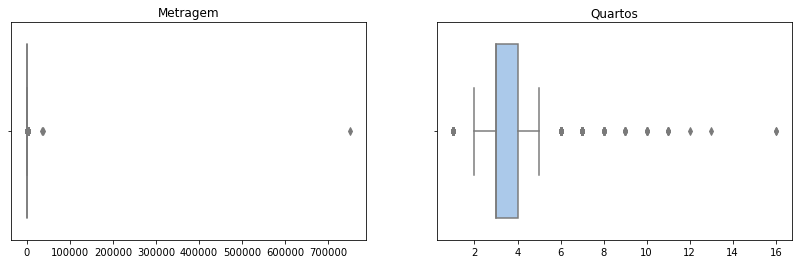

In [17]:
f,ax= plt.subplots(nrows=1, ncols=2,figsize=(14,4))
sns.boxplot(x='Metragem', data=dados_venda, orient="h", palette='pastel', ax=ax[0]);
ax[0].set_title('Metragem')
ax[0].set_xlabel(None)
sns.boxplot(x='Quartos', data=dados_venda, orient="h", palette='pastel', ax=ax[1]);
ax[1].set_title('Quartos')
ax[1].set_xlabel(None)
plt.show()

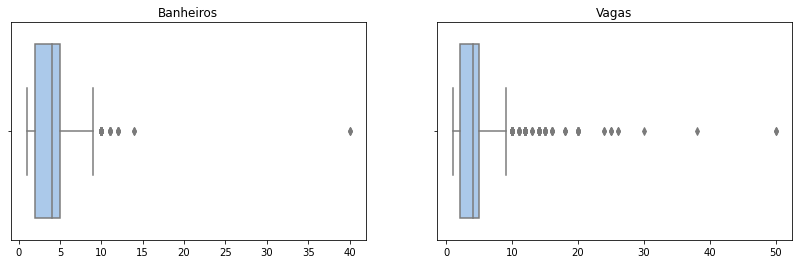

In [18]:
f,ax= plt.subplots(nrows=1, ncols=2,figsize=(14,4))
sns.boxplot(x='Banheiros', data=dados_venda, orient="h", palette='pastel', ax=ax[0]);
ax[0].set_title('Banheiros')
ax[0].set_xlabel(None)
sns.boxplot(x='Vagas', data=dados_venda, orient="h", palette='pastel', ax=ax[1]);
ax[1].set_title('Vagas')
ax[1].set_xlabel(None)
plt.show()

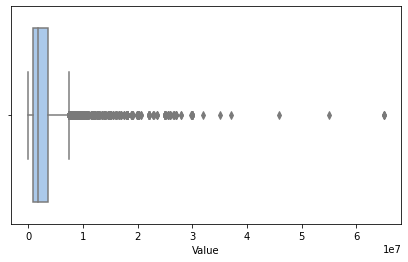

In [19]:
plt.figure(figsize=(7,4))
sns.boxplot(x='Value', data=dados_venda, orient="h", palette='pastel');

- Observou-se maior distanciamento para os outliers de Metragem e nº de Banheiros;
- Apesar das variáveis Quartos e Vagas apresentarem outliers, alguns desses pontos ocorrem com uma certa frequência e próximo de alguns valores;
- Verificar com os especialistas da área qual seria a melhor decisão a ser tomada quanto a esses valores.

In [20]:
dados_venda.describe(include='O')

,Rua,Bairro,Cidade,Valor,Moeda,Tipo
count,6107,9146,9156,9156,9156,0
unique,3006,697,1,939,1,0
top,Rua Alberto Faria,Alto de Pinheiros,São Paulo,R$ 2.500.000,R$,NaN
freq,24,369,9156,182,9156,NaN


## Verificar Outliers

In [21]:
dados_venda.shape

(9156, 11)

In [22]:
dados_venda.loc[(dados_venda['Metragem'] > 300000) | (dados_venda['Banheiros'] > 30) | (dados_venda['Vagas'] >= 30)]

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Value,Tipo
1586,Rua Araruba,Praia da Lagoa,São Paulo,600,4,5,38,R$ 7.500.000,R$,7500000.00,None
1598,Rua Desembargador Paulo Passaláqua,Pacaembu,São Paulo,826,7,7,30,R$ 8.000.000,R$,8000000.00,None
2062,NaN,Jardim Guedala,São Paulo,488,4,40,4,R$ 2.600.000,R$,2600000.00,None
2159,NaN,Jardim Guedala,São Paulo,493,4,40,4,R$ 2.600.000,R$,2600000.00,None
4969,Rua Comendador Elias Zarzur,Santo Amaro,São Paulo,500,4,10,50,R$ 3.700.000,R$,3700000.00,None
5450,Rua Comendador Elias Zarzur,Santo Amaro,São Paulo,505,4,10,50,R$ 3.700.000,R$,3700000.00,None
9845,Avenida George Saville Dodd,Jardim Guedala,São Paulo,750000,5,9,6,R$ 7.000.000,R$,7000000.00,None


In [23]:
dados_venda = dados_venda.query('Metragem < 300000 & Banheiros < 30 & Vagas < 30')

In [24]:
dados_venda.shape

(9149, 11)

## Verificar dados nulos

In [25]:
dados_venda.isnull().sum()

Rua          3047
Bairro         10
Cidade          0
Metragem        0
Quartos         0
Banheiros       0
Vagas           0
Valor           0
Moeda           0
Value           0
Tipo         9149
dtype: int64

### Preencher itens faltantes de "Bairro" com o valor da moda

In [26]:
bairro_mode = dados_venda['Bairro'].mode()[0]

dados_venda['Bairro'].fillna(value=bairro_mode, axis=0, inplace=True)

In [27]:
dados_venda.isnull().sum()

Rua          3047
Bairro          0
Cidade          0
Metragem        0
Quartos         0
Banheiros       0
Vagas           0
Valor           0
Moeda           0
Value           0
Tipo         9149
dtype: int64

### Eliminar variáveis: Tipo, Valor e Moeda

In [28]:
dados_venda.drop(labels= ['Tipo','Valor','Moeda'], axis=1, inplace=True)

In [29]:
dados_venda.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Value
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000.00
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000.00
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000.00
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,685000.00
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540000.00


In [30]:
dados_venda.shape

(9149, 8)

# Agregação (feature engineering)

## Adicionar características calculadas a partir do conjunto "dados_venda"

### Valor do metro quadrado (m2) de cada imóvel

In [31]:
dados_venda['Valor_m2_ap'] = dados_venda['Value'] / dados_venda['Metragem']

In [32]:
dados_venda.head(3)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Value,Valor_m2_ap
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000.00,7000.00
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000.00,7459.68
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000.00,3040.00


### Valor médio do preço do metro quadrado dos apartamentos de cada bairro 

É a média dos valores de "Valor_m2_ap" agrupadas por bairro

In [33]:
valor_m2_ap_bairro = dados_venda.groupby(by='Bairro')['Valor_m2_ap'].mean()

In [34]:
valor_m2_ap_bairro

Bairro
Aclimação            7656.17
Alto da Boa Vista    5849.57
Alto da Lapa         7606.73
Alto da Mooca        5691.74
Alto de Pinheiros   11169.66
                      ...   
Vila Água Funda      4467.13
Água Branca          7269.11
Água Fria            5841.10
Água Funda           3876.86
Água Rasa            4509.61
Name: Valor_m2_ap, Length: 697, dtype: float64

### Valor geral do preço do metro quadrado por bairro 

É a soma de todos os valores de Value (R$) dividido pela soma das metragens (m2)

In [35]:
valor_geral_m2_bro = dados_venda.groupby(by='Bairro')['Value'].sum() / dados_venda.groupby(by='Bairro')['Metragem'].sum()

In [36]:
valor_geral_m2_bro

Bairro
Aclimação            7162.69
Alto da Boa Vista    5708.74
Alto da Lapa         6961.30
Alto da Mooca        4385.00
Alto de Pinheiros   11004.30
                      ...   
Vila Água Funda      4283.84
Água Branca          7065.77
Água Fria            5604.53
Água Funda           3920.86
Água Rasa            3846.91
Length: 697, dtype: float64

### Bairros mais frequentes

In [37]:
len(dados_venda['Bairro'].unique())

697

In [38]:
top_bairro = dados_venda['Bairro'].value_counts()

In [39]:
top_bairro

Alto de Pinheiros         379
Jardim Guedala            350
Jardim Paulista           266
Brooklin Paulista         224
Jardim Europa             210
                         ... 
Jardim Benfica              1
Parque Maria Fernandes      1
Jardim do Carmo             1
Jardim Rio Pequeno          1
Vila Ponte Rasa             1
Name: Bairro, Length: 697, dtype: int64

### Colocar "valor_m2_ap_bairro", "valor_geral_m2_bro" e "top_bairro" em um mesmo data frame e adicionar ao conjunto de dados principal

In [40]:
summary_m2_df = pd.concat([valor_m2_ap_bairro,valor_geral_m2_bro,top_bairro], axis=1)
summary_m2_df = summary_m2_df.reset_index()

summary_m2_df.head(2)

,index,Valor_m2_ap,0,Bairro
0,Aclimação,7656.17,7162.69,79
1,Alto da Boa Vista,5849.57,5708.74,8


In [41]:
col_summary_m2_df = {'index':'Bairro',               
                     'Valor_m2_ap':'Valor_med_m2_ap', 
                     0:'Valor_m2_bro',
                     'Bairro':'N_freq_bro'}

summary_m2_df.rename(columns=col_summary_m2_df, inplace=True)

In [42]:
summary_m2_df.head(2)

,Bairro,Valor_med_m2_ap,Valor_m2_bro,N_freq_bro
0,Aclimação,7656.17,7162.69,79
1,Alto da Boa Vista,5849.57,5708.74,8


In [43]:
dados_venda.head(2)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Value,Valor_m2_ap
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000.00,7000.00
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000.00,7459.68


#### Merge

In [44]:
pd.merge(left=dados_venda, right=summary_m2_df, how="left", on="Bairro").head(3)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Value,Valor_m2_ap,Valor_med_m2_ap,Valor_m2_bro,N_freq_bro
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000.00,7000.00,6447.72,6327.54,184
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000.00,7459.68,9329.48,9167.47,24
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000.00,3040.00,3040.00,3040.00,1


In [45]:
dados_venda_m2 = pd.merge(left=dados_venda, right=summary_m2_df, how="left", on="Bairro")

In [46]:
dados_venda_m2.shape

(9149, 12)

In [47]:
dados_venda_m2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9149 entries, 0 to 9148
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rua              6102 non-null   object 
 1   Bairro           9149 non-null   object 
 2   Cidade           9149 non-null   object 
 3   Metragem         9149 non-null   int64  
 4   Quartos          9149 non-null   int64  
 5   Banheiros        9149 non-null   int64  
 6   Vagas            9149 non-null   int64  
 7   Value            9149 non-null   float64
 8   Valor_m2_ap      9149 non-null   float64
 9   Valor_med_m2_ap  9149 non-null   float64
 10  Valor_m2_bro     9149 non-null   float64
 11  N_freq_bro       9149 non-null   int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 929.2+ KB


## Carregar "endereços.csv" 

In [48]:
enderecos_BR = pd.read_csv('enderecos.csv', low_memory=False)

In [49]:
enderecos_BR.head(3)

,tipo_logr,logr_nome,logr_compl,numero,bairro,nome_localidade,sigla_uf,cep,latitude,longitude
0,Rua,Armando Silveira,Rua Armando Silveira,NaN,Divisa,Santana do Livramento,RS,97573200.00,-30.88,-55.55
1,Rua,João Antônio Vasconcelos,Rua João Antônio Vasconcelos - até 627/628,627,Amizade,Araçatuba,SP,16074320.00,-21.19,-50.45
2,Rua,Prefeito Agenor Barcelos Feio,Rua Prefeito Agenor Barcelos Feio,NaN,Registro,Santana do Livramento,RS,97571090.00,-30.86,-55.56


In [50]:
enderecos_BR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1113886 entries, 0 to 1113885
Data columns (total 10 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   tipo_logr        1113559 non-null  object 
 1   logr_nome        1113566 non-null  object 
 2   logr_compl       1113567 non-null  object 
 3   numero           28810 non-null    object 
 4   bairro           1113546 non-null  object 
 5   nome_localidade  1093788 non-null  object 
 6   sigla_uf         1093788 non-null  object 
 7   cep              1093788 non-null  float64
 8   latitude         1090660 non-null  float64
 9   longitude        1090660 non-null  float64
dtypes: float64(3), object(7)
memory usage: 85.0+ MB


In [51]:
enderecos_BR.shape

(1113886, 10)

### Filtrar endereços de São Paulo

In [52]:
enderecos_sp = enderecos_BR.loc[enderecos_BR['sigla_uf'] == 'SP'] 
enderecos_sp.shape

(298124, 10)

In [53]:
enderecos_sp.head(3)

,tipo_logr,logr_nome,logr_compl,numero,bairro,nome_localidade,sigla_uf,cep,latitude,longitude
1,Rua,João Antônio Vasconcelos,Rua João Antônio Vasconcelos - até 627/628,627,Amizade,Araçatuba,SP,16074320.00,-21.19,-50.45
413269,Rua,A,Rua A,NaN,Jardim Glória,Americana,SP,13468220.00,-22.76,-47.34
413270,Rua,A,Rua A,NaN,Jardim São Roque,Americana,SP,13469414.00,-22.74,-47.35


### Formar e tratar o nome da "Rua" ("tipo_logr" + "logr_nome")

In [54]:
rua = enderecos_sp["tipo_logr"] + " " + enderecos_sp["logr_nome"]
rua

1           Rua João Antônio Vasconcelos
413269                             Rua A
413270                             Rua A
413271                             Rua A
413272                  Rua João Bandini
                       ...              
1113858              Rua Daniel Buccieri
1113865               Rua Ottorino Rizzi
1113873    Rua Adriano Michelutti Cândia
1113882            Rodovia Mario Tonolli
1113884                   Rua Tiradentes
Length: 298124, dtype: object

In [55]:
pd.concat([enderecos_sp,rua], axis=1)

,tipo_logr,logr_nome,logr_compl,numero,bairro,nome_localidade,sigla_uf,cep,latitude,longitude,0
1,Rua,João Antônio Vasconcelos,Rua João Antônio Vasconcelos - até 627/628,627,Amizade,Araçatuba,SP,16074320.00,-21.19,-50.45,Rua João Antônio Vasconcelos
413269,Rua,A,Rua A,NaN,Jardim Glória,Americana,SP,13468220.00,-22.76,-47.34,Rua A
413270,Rua,A,Rua A,NaN,Jardim São Roque,Americana,SP,13469414.00,-22.74,-47.35,Rua A
413271,Rua,A,Rua A,NaN,Iate Clube de Campinas,Americana,SP,13475620.00,-22.74,-47.33,Rua A
413272,Rua,João Bandini,Rua João Bandini,NaN,Jardim Miriam,Americana,SP,13469072.00,-22.74,-47.35,Rua João Bandini
...,...,...,...,...,...,...,...,...,...,...,...
1113858,Rua,Daniel Buccieri,Rua Daniel Buccieri,NaN,Jardim Alvorada,Monte Mor,SP,13198524.00,-22.93,-47.27,Rua Daniel Buccieri
1113865,Rua,Ottorino Rizzi,Rua Ottorino Rizzi,NaN,Royal Park,Ribeirão Preto,SP,14028563.00,-21.24,-47.83,Rua Ottorino Rizzi
1113873,Rua,Adriano Michelutti Cândia,Rua Adriano Michelutti Cândia,NaN,Jardim San Marco II,Ribeirão Preto,SP,14035198.00,-21.20,-47.74,Rua Adriano Michelutti Cândia
1113882,Rodovia,Mario Tonolli,Rodovia Mario Tonolli,NaN,Morro Alto,Itupeva,SP,13297002.00,-23.19,-47.08,Rodovia Mario Tonolli


In [56]:
enderecos_sp = pd.concat([enderecos_sp,rua], axis=1)

enderecos_sp.rename(columns = {0:'Rua'}, inplace=True)

In [57]:
enderecos_sp.head(3)

,tipo_logr,logr_nome,logr_compl,numero,bairro,nome_localidade,sigla_uf,cep,latitude,longitude,Rua
1,Rua,João Antônio Vasconcelos,Rua João Antônio Vasconcelos - até 627/628,627,Amizade,Araçatuba,SP,16074320.00,-21.19,-50.45,Rua João Antônio Vasconcelos
413269,Rua,A,Rua A,NaN,Jardim Glória,Americana,SP,13468220.00,-22.76,-47.34,Rua A
413270,Rua,A,Rua A,NaN,Jardim São Roque,Americana,SP,13469414.00,-22.74,-47.35,Rua A


In [58]:
enderecos_sp['Rua'] = enderecos_sp['Rua'].str.lower().str.strip()

In [59]:
enderecos_sp.head(3)

,tipo_logr,logr_nome,logr_compl,numero,bairro,nome_localidade,sigla_uf,cep,latitude,longitude,Rua
1,Rua,João Antônio Vasconcelos,Rua João Antônio Vasconcelos - até 627/628,627,Amizade,Araçatuba,SP,16074320.00,-21.19,-50.45,rua joão antônio vasconcelos
413269,Rua,A,Rua A,NaN,Jardim Glória,Americana,SP,13468220.00,-22.76,-47.34,rua a
413270,Rua,A,Rua A,NaN,Jardim São Roque,Americana,SP,13469414.00,-22.74,-47.35,rua a


### Tratar base de dados "dados_venda_m2" para unir com a base de dados de "endereços_sp"

In [60]:
dados_venda_m2.head(3)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Value,Valor_m2_ap,Valor_med_m2_ap,Valor_m2_bro,N_freq_bro
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000.00,7000.00,6447.72,6327.54,184
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000.00,7459.68,9329.48,9167.47,24
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000.00,3040.00,3040.00,3040.00,1


In [61]:
dados_venda_m2["Nome_rua"] = dados_venda_m2["Rua"].str.extract(r'(^[\w ]+)')
dados_venda_m2["Nome_rua"] = dados_venda_m2["Nome_rua"].str.lower().str.strip()

In [62]:
dados_venda_m2.head(3)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Value,Valor_m2_ap,Valor_med_m2_ap,Valor_m2_bro,N_freq_bro,Nome_rua
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000.00,7000.00,6447.72,6327.54,184,avenida itacira
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000.00,7459.68,9329.48,9167.47,24,rua aurelia perez alvarez
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000.00,3040.00,3040.00,3040.00,1,rua alba valdez


In [63]:
dados_venda_m2.describe(include='O')

,Rua,Bairro,Cidade,Nome_rua
count,6102,9149,9149,6102
unique,3004,697,1,2522
top,Rua Alberto Faria,Alto de Pinheiros,São Paulo,rua alberto faria
freq,24,379,9149,29


In [64]:
dados_venda_m2.shape, enderecos_sp.shape

((9149, 13), (298124, 11))

In [65]:
enderecos_sp.head(2)

,tipo_logr,logr_nome,logr_compl,numero,bairro,nome_localidade,sigla_uf,cep,latitude,longitude,Rua
1,Rua,João Antônio Vasconcelos,Rua João Antônio Vasconcelos - até 627/628,627,Amizade,Araçatuba,SP,16074320.00,-21.19,-50.45,rua joão antônio vasconcelos
413269,Rua,A,Rua A,NaN,Jardim Glória,Americana,SP,13468220.00,-22.76,-47.34,rua a


#### Merge

In [66]:
dados_venda_geo = pd.merge(left=dados_venda_m2, 
                           right=enderecos_sp[['Rua','bairro','cep','latitude','longitude']],
                           how='left', 
                           left_on=['Nome_rua','Bairro'], 
                           right_on=['Rua','bairro'])
dados_venda_geo.shape

(12537, 18)

In [67]:
dados_venda_geo.head(2)

,Rua_x,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Value,Valor_m2_ap,Valor_med_m2_ap,Valor_m2_bro,N_freq_bro,Nome_rua,Rua_y,bairro,cep,latitude,longitude
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000.00,7000.00,6447.72,6327.54,184,avenida itacira,avenida itacira,Planalto Paulista,4061000.00,-23.62,-46.65
1,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000.00,7000.00,6447.72,6327.54,184,avenida itacira,avenida itacira,Planalto Paulista,4061001.00,-23.62,-46.65


In [68]:
dados_venda_geo = dados_venda_geo.drop_duplicates().query('cep > 0')
dados_venda_geo.shape

(8589, 18)

In [69]:
dados_venda_geo = dados_venda_geo.drop(labels=['Rua_x','Rua_y','bairro'], axis=1)

In [70]:
dados_venda_geo = dados_venda_geo[['Nome_rua','Bairro','Cidade','cep','latitude','longitude',
                                   'Quartos','Banheiros','Vagas','Metragem','Value', 'Valor_m2_ap',
                                   'Valor_med_m2_ap', 'Valor_m2_bro', 'N_freq_bro']]

In [71]:
dados_venda_geo.head()

,Nome_rua,Bairro,Cidade,cep,latitude,longitude,Quartos,Banheiros,Vagas,Metragem,Value,Valor_m2_ap,Valor_med_m2_ap,Valor_m2_bro,N_freq_bro
0,avenida itacira,Planalto Paulista,São Paulo,4061000.00,-23.62,-46.65,4,8,6,1000,7000000.00,7000.00,6447.72,6327.54,184
1,avenida itacira,Planalto Paulista,São Paulo,4061001.00,-23.62,-46.65,4,8,6,1000,7000000.00,7000.00,6447.72,6327.54,184
2,avenida itacira,Planalto Paulista,São Paulo,4061002.00,-23.62,-46.65,4,8,6,1000,7000000.00,7000.00,6447.72,6327.54,184
3,avenida itacira,Planalto Paulista,São Paulo,4061003.00,-23.62,-46.65,4,8,6,1000,7000000.00,7000.00,6447.72,6327.54,184
4,rua aurelia perez alvarez,Jardim dos Estados,São Paulo,4642020.00,-23.64,-46.69,4,4,4,496,3700000.00,7459.68,9329.48,9167.47,24


## Carregar setor censitário

In [72]:
setor_censo = gpd.read_file('35SEE250GC_SIR.shp')
setor_censo.head(3)

,ID,CD_GEOCODI,TIPO,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,NM_MUNICIP,NM_MICRO,NM_MESO,CD_GEOCODB,NM_BAIRRO,ID1,geometry
0,98237.00,354100005000009,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,1,"POLYGON ((-46.41024 -24.01103, -46.41169 -24.0..."
1,98232.00,354100005000004,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,2,"POLYGON ((-46.41606 -24.00245, -46.41598 -24.0..."
2,98230.00,354100005000002,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,3,"POLYGON ((-46.41213 -24.00792, -46.41244 -24.0..."


In [73]:
setor_censo.shape

(68296, 15)

### Setor censitário da cidade de São Paulo

In [74]:
setor_censo_sp = setor_censo[setor_censo.NM_MUNICIP == 'SÃO PAULO'].copy(deep=True)
setor_censo_sp.head(3)

,ID,CD_GEOCODI,TIPO,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,NM_MUNICIP,NM_MICRO,NM_MESO,CD_GEOCODB,NM_BAIRRO,ID1,geometry
42322,109347.00,355030804000079,URBANO,35503080400,None,355030804,ARICANDUVA,3550308,SÃO PAULO,SÃO PAULO,METROPOLITANA DE SÃO PAULO,None,None,42323,"POLYGON ((-46.51778 -23.57947, -46.51786 -23.5..."
42323,109348.00,355030804000080,URBANO,35503080400,None,355030804,ARICANDUVA,3550308,SÃO PAULO,SÃO PAULO,METROPOLITANA DE SÃO PAULO,None,None,42324,"POLYGON ((-46.51888 -23.57967, -46.51908 -23.5..."
42324,109349.00,355030804000081,URBANO,35503080400,None,355030804,ARICANDUVA,3550308,SÃO PAULO,SÃO PAULO,METROPOLITANA DE SÃO PAULO,None,None,42325,"POLYGON ((-46.52015 -23.58105, -46.52026 -23.5..."


In [75]:
setor_censo_sp.shape

(18953, 15)

### Verificar o setor censitário referente de uma dada longitude e latitude

In [76]:
latitude = -23.58	
longitude = -46.63
setor_censo_sp[setor_censo_sp.contains(Point(longitude, latitude))]

,ID,CD_GEOCODI,TIPO,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,NM_MUNICIP,NM_MICRO,NM_MESO,CD_GEOCODB,NM_BAIRRO,ID1,geometry
60986,126568.00,355030890000080,URBANO,35503089000,None,355030890,VILA MARIANA,3550308,SÃO PAULO,SÃO PAULO,METROPOLITANA DE SÃO PAULO,None,None,60987,"POLYGON ((-46.62618 -23.58169, -46.62863 -23.5..."


### Gerar o conjunto de pontos referentes a cada longitude e latitude de "dados_venda_geo"

In [77]:
dados_venda_geo.head(2)

,Nome_rua,Bairro,Cidade,cep,latitude,longitude,Quartos,Banheiros,Vagas,Metragem,Value,Valor_m2_ap,Valor_med_m2_ap,Valor_m2_bro,N_freq_bro
0,avenida itacira,Planalto Paulista,São Paulo,4061000.00,-23.62,-46.65,4,8,6,1000,7000000.00,7000.00,6447.72,6327.54,184
1,avenida itacira,Planalto Paulista,São Paulo,4061001.00,-23.62,-46.65,4,8,6,1000,7000000.00,7000.00,6447.72,6327.54,184


In [78]:
dados_venda_geo['Points'] = ''
for i in dados_venda_geo.index:
    dados_venda_geo.loc[i, 'Points'] = Point(dados_venda_geo.loc[i, 'longitude'], dados_venda_geo.loc[i, 'latitude'])

C:\Users\Gleynner\anaconda3\lib\site-packages\pandas\core\internals\managers.py:427: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  applied = getattr(b, f)(**kwargs)


In [79]:
dados_venda_geo.head(2)

,Nome_rua,Bairro,Cidade,cep,latitude,longitude,Quartos,Banheiros,Vagas,Metragem,Value,Valor_m2_ap,Valor_med_m2_ap,Valor_m2_bro,N_freq_bro,Points
0,avenida itacira,Planalto Paulista,São Paulo,4061000.00,-23.62,-46.65,4,8,6,1000,7000000.00,7000.00,6447.72,6327.54,184,POINT (-46.6481622 -23.6157934)
1,avenida itacira,Planalto Paulista,São Paulo,4061001.00,-23.62,-46.65,4,8,6,1000,7000000.00,7000.00,6447.72,6327.54,184,POINT (-46.6481622 -23.6157934)


### Adicionar o código do setor censitário a cada localidade (por meio de Points) de "dados_venda_geo"

In [80]:
setor_censo_sp.head(2)

,ID,CD_GEOCODI,TIPO,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,NM_MUNICIP,NM_MICRO,NM_MESO,CD_GEOCODB,NM_BAIRRO,ID1,geometry
42322,109347.00,355030804000079,URBANO,35503080400,None,355030804,ARICANDUVA,3550308,SÃO PAULO,SÃO PAULO,METROPOLITANA DE SÃO PAULO,None,None,42323,"POLYGON ((-46.51778 -23.57947, -46.51786 -23.5..."
42323,109348.00,355030804000080,URBANO,35503080400,None,355030804,ARICANDUVA,3550308,SÃO PAULO,SÃO PAULO,METROPOLITANA DE SÃO PAULO,None,None,42324,"POLYGON ((-46.51888 -23.57967, -46.51908 -23.5..."


Obs.: o processo abaixo gasta mais tempo, então salvei um arquivo ".csv" com a execução dessa etapa concluída e retorno do mesmo ponto. 

Segue abaixo o código para verificar em qual setor censitário cada ponto (Points) está contido. 

In [81]:
#dados_venda_geo['setor_censo'] = dados_venda_geo["Points"]\
#.map(lambda x: setor_censo_sp.loc[setor_censo_sp.contains(x), 'CD_GEOCODI'].values).str[0]
#dados_venda_geo

In [82]:
#dados_venda_geo.to_csv('dados_venda_geo_copy_v3.csv', index=False)
dados_venda_geo = pd.read_csv('dados_venda_geo_copy_v3.csv')

In [83]:
dados_venda_geo_cens = dados_venda_geo.copy(deep=True)

In [84]:
dados_venda_geo_cens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8589 entries, 0 to 8588
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Nome_rua         8589 non-null   object 
 1   Bairro           8589 non-null   object 
 2   Cidade           8589 non-null   object 
 3   cep              8589 non-null   float64
 4   latitude         8589 non-null   float64
 5   longitude        8589 non-null   float64
 6   Quartos          8589 non-null   int64  
 7   Banheiros        8589 non-null   int64  
 8   Vagas            8589 non-null   int64  
 9   Metragem         8589 non-null   int64  
 10  Value            8589 non-null   float64
 11  Valor_m2_ap      8589 non-null   float64
 12  Valor_med_m2_ap  8589 non-null   float64
 13  Valor_m2_bro     8589 non-null   float64
 14  N_freq_bro       8589 non-null   int64  
 15  Points           8589 non-null   object 
 16  setor_censo      7731 non-null   float64
dtypes: float64(8),

In [85]:
dados_venda_geo_cens.dropna(subset=["setor_censo"],axis=0, inplace=True)

In [86]:
dados_venda_geo_cens.isnull().sum()

Nome_rua           0
Bairro             0
Cidade             0
cep                0
latitude           0
longitude          0
Quartos            0
Banheiros          0
Vagas              0
Metragem           0
Value              0
Valor_m2_ap        0
Valor_med_m2_ap    0
Valor_m2_bro       0
N_freq_bro         0
Points             0
setor_censo        0
dtype: int64

In [87]:
dados_venda_geo_cens.shape

(7731, 17)

In [88]:
dados_venda_geo_cens.head()

,Nome_rua,Bairro,Cidade,cep,latitude,longitude,Quartos,Banheiros,Vagas,Metragem,Value,Valor_m2_ap,Valor_med_m2_ap,Valor_m2_bro,N_freq_bro,Points,setor_censo
0,avenida itacira,Planalto Paulista,São Paulo,4061000.00,-23.62,-46.65,4,8,6,1000,7000000.00,7000.00,6447.72,6327.54,184,POINT (-46.6481622 -23.6157934),355030877000067.00
1,avenida itacira,Planalto Paulista,São Paulo,4061001.00,-23.62,-46.65,4,8,6,1000,7000000.00,7000.00,6447.72,6327.54,184,POINT (-46.6481622 -23.6157934),355030877000067.00
2,avenida itacira,Planalto Paulista,São Paulo,4061002.00,-23.62,-46.65,4,8,6,1000,7000000.00,7000.00,6447.72,6327.54,184,POINT (-46.6481622 -23.6157934),355030877000067.00
3,avenida itacira,Planalto Paulista,São Paulo,4061003.00,-23.62,-46.65,4,8,6,1000,7000000.00,7000.00,6447.72,6327.54,184,POINT (-46.6481622 -23.6157934),355030877000067.00
4,rua aurelia perez alvarez,Jardim dos Estados,São Paulo,4642020.00,-23.64,-46.69,4,4,4,496,3700000.00,7459.68,9329.48,9167.47,24,POINT (-46.6883114 -23.6409612),355030871000023.00


#### Merge

In [89]:
dados_venda_geo_cens['setor_censo'] = dados_venda_geo_cens['setor_censo'].astype('int64')

setor_censo_sp['CD_GEOCODI'] = setor_censo_sp['CD_GEOCODI'].astype('int64')

In [90]:
dados_venda_geo_cens = pd.merge(left = dados_venda_geo_cens, 
                                right = setor_censo_sp[['CD_GEOCODI','geometry']], 
                                how = "left", 
                                left_on = "setor_censo", 
                                right_on = "CD_GEOCODI")


In [91]:
dados_venda_geo_cens.drop('CD_GEOCODI', axis=1, inplace=True)

In [92]:
dados_venda_geo_cens = dados_venda_geo_cens[['setor_censo','Nome_rua','Bairro','Cidade','cep','latitude','longitude', 
                                             'Points','geometry','Quartos','Banheiros','Vagas','Metragem','Value', 
                                             'Valor_m2_ap','Valor_med_m2_ap','Valor_m2_bro','N_freq_bro']]

In [93]:
dados_venda_geo_cens.head(2)

,setor_censo,Nome_rua,Bairro,Cidade,cep,latitude,longitude,Points,geometry,Quartos,Banheiros,Vagas,Metragem,Value,Valor_m2_ap,Valor_med_m2_ap,Valor_m2_bro,N_freq_bro
0,355030877000067,avenida itacira,Planalto Paulista,São Paulo,4061000.00,-23.62,-46.65,POINT (-46.6481622 -23.6157934),"POLYGON ((-46.64827 -23.61523, -46.64802 -23.6...",4,8,6,1000,7000000.00,7000.00,6447.72,6327.54,184
1,355030877000067,avenida itacira,Planalto Paulista,São Paulo,4061001.00,-23.62,-46.65,POINT (-46.6481622 -23.6157934),"POLYGON ((-46.64827 -23.61523, -46.64802 -23.6...",4,8,6,1000,7000000.00,7000.00,6447.72,6327.54,184


## Carregar dados do IBGE - SP (Censo Demográfico 2010)

In [94]:
ibge_sp = pd.read_csv("Basico_SP1.csv", sep=";", encoding='ISO-8859-1', thousands='.', decimal=',')

In [95]:
ibge_sp.head()

,Cod_setor,Cod_Grandes Regiï¿½es,Nome_Grande_Regiao,Cod_UF,Nome_da_UF,Cod_meso,Nome_da_meso,Cod_micro,Nome_da_micro,Cod_RM,...,V004,V005,V006,V007,V008,V009,V010,V011,V012,Unnamed: 33
0,355030801000001,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,2.32,2091.32,8532451.78,2164.55,8673276.78,1227.41,4285771.99,1713.75,5152087.86,NaN
1,355030801000002,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,2.09,1650.09,3983441.31,1717.44,4030519.99,1045.78,2572133.32,1468.08,2991546.94,NaN
2,355030801000003,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,3.08,1280.43,5474593.06,2349.53,7553913.02,902.97,2735492.52,1786.79,3837674.74,NaN
3,355030801000004,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,2.26,1119.59,3572955.10,1859.13,4567289.50,869.09,2122409.02,1567.41,2735383.24,NaN
4,355030801000005,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,2.35,1416.90,2240207.58,1581.66,2240109.39,917.71,1570047.75,1356.35,1725877.85,NaN


In [96]:
ibge_sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18363 entries, 0 to 18362
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Cod_setor              18363 non-null  int64  
 1   Cod_Grandes Regiï¿½es  18363 non-null  int64  
 2   Nome_Grande_Regiao     18363 non-null  object 
 3   Cod_UF                 18363 non-null  int64  
 4   Nome_da_UF             18363 non-null  object 
 5   Cod_meso               18363 non-null  int64  
 6   Nome_da_meso           18363 non-null  object 
 7   Cod_micro              18363 non-null  int64  
 8   Nome_da_micro          18363 non-null  object 
 9   Cod_RM                 18363 non-null  int64  
 10  Nome_da_RM             18363 non-null  object 
 11  Cod_municipio          18363 non-null  int64  
 12  Nome_do_municipio      18363 non-null  object 
 13  Cod_distrito           18363 non-null  int64  
 14  Nome_do_distrito       18363 non-null  object 
 15  Co

In [97]:
ibge_sp.shape

(18363, 34)

### Selecionar colunas de interesse para a análise

In [98]:
ibge_select = ['Cod_setor','V001','V003','V005','V007']

ibge_sp_1 = ibge_sp[ibge_select].copy(deep=True)

- Metadata dos dados (Básico_UF.csv):

V001: Domicílios particulares permanentes ou pessoas responsáveis por domicílios particulares permanentes   <br>
V003: Média do número de moradores em domicílios particulares permanentes (obtida pela divisão de Var2 por Var1)     <br>
V005: Valor do rendimento nominal médio mensal das pessoas responsáveis por domicílios particulares permanentes (com e sem rendimento)    <br>
V007: Valor do rendimento nominal médio mensal das pessoas responsáveis por domicílios particulares permanentes (com rendimento)

In [99]:
col_ibge = {'V001':'Domicilios', 
            'V003':'Med_morador_dom',
            'V005':'Rendimento_med_fam',
            'V007':'Renda_trabalhador'}

ibge_sp_1.rename(columns = col_ibge, inplace=True)

In [100]:
ibge_sp_1.head(2)

,Cod_setor,Domicilios,Med_morador_dom,Rendimento_med_fam,Renda_trabalhador
0,355030801000001,266.00,3.01,2091.32,2164.55
1,355030801000002,306.00,2.98,1650.09,1717.44


### Adicionar informações selecionadas do IBGE-SP à base de dados "dados_venda_geo_cens"

In [101]:
dados_venda_geo_cens.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7731 entries, 0 to 7730
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   setor_censo      7731 non-null   int64   
 1   Nome_rua         7731 non-null   object  
 2   Bairro           7731 non-null   object  
 3   Cidade           7731 non-null   object  
 4   cep              7731 non-null   float64 
 5   latitude         7731 non-null   float64 
 6   longitude        7731 non-null   float64 
 7   Points           7731 non-null   object  
 8   geometry         7731 non-null   geometry
 9   Quartos          7731 non-null   int64   
 10  Banheiros        7731 non-null   int64   
 11  Vagas            7731 non-null   int64   
 12  Metragem         7731 non-null   int64   
 13  Value            7731 non-null   float64 
 14  Valor_m2_ap      7731 non-null   float64 
 15  Valor_med_m2_ap  7731 non-null   float64 
 16  Valor_m2_bro     7731 non-null   float64 


In [102]:
ibge_sp_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18363 entries, 0 to 18362
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cod_setor           18363 non-null  int64  
 1   Domicilios          18333 non-null  float64
 2   Med_morador_dom     18333 non-null  float64
 3   Rendimento_med_fam  18333 non-null  float64
 4   Renda_trabalhador   18324 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 717.4 KB


#### Merge

In [103]:
pd.merge(left=dados_venda_geo_cens, right=ibge_sp_1, how='left', left_on='setor_censo', right_on='Cod_setor').head(3)

,setor_censo,Nome_rua,Bairro,Cidade,cep,latitude,longitude,Points,geometry,Quartos,...,Value,Valor_m2_ap,Valor_med_m2_ap,Valor_m2_bro,N_freq_bro,Cod_setor,Domicilios,Med_morador_dom,Rendimento_med_fam,Renda_trabalhador
0,355030877000067,avenida itacira,Planalto Paulista,São Paulo,4061000.00,-23.62,-46.65,POINT (-46.6481622 -23.6157934),"POLYGON ((-46.64827 -23.61523, -46.64802 -23.6...",4,...,7000000.00,7000.00,6447.72,6327.54,184,355030877000067.00,164.00,2.66,3158.96,5570.65
1,355030877000067,avenida itacira,Planalto Paulista,São Paulo,4061001.00,-23.62,-46.65,POINT (-46.6481622 -23.6157934),"POLYGON ((-46.64827 -23.61523, -46.64802 -23.6...",4,...,7000000.00,7000.00,6447.72,6327.54,184,355030877000067.00,164.00,2.66,3158.96,5570.65
2,355030877000067,avenida itacira,Planalto Paulista,São Paulo,4061002.00,-23.62,-46.65,POINT (-46.6481622 -23.6157934),"POLYGON ((-46.64827 -23.61523, -46.64802 -23.6...",4,...,7000000.00,7000.00,6447.72,6327.54,184,355030877000067.00,164.00,2.66,3158.96,5570.65


In [104]:
dados_vendas_full = pd.merge(left = dados_venda_geo_cens, 
                             right = ibge_sp_1, 
                             how = 'left', 
                             left_on = 'setor_censo', 
                             right_on = 'Cod_setor')

In [105]:
dados_vendas_full.drop(labels='Cod_setor', axis=1, inplace=True)

In [106]:
dados_vendas_full.isnull().sum()

setor_censo           0
Nome_rua              0
Bairro                0
Cidade                0
cep                   0
latitude              0
longitude             0
Points                0
geometry              0
Quartos               0
Banheiros             0
Vagas                 0
Metragem              0
Value                 0
Valor_m2_ap           0
Valor_med_m2_ap       0
Valor_m2_bro          0
N_freq_bro            0
Domicilios            6
Med_morador_dom       6
Rendimento_med_fam    6
Renda_trabalhador     6
dtype: int64

In [107]:
dados_vendas_full.shape

(7731, 22)

In [108]:
dados_vendas_full.dropna(axis=0, inplace=True)

In [109]:
dados_vendas_full.shape

(7725, 22)

In [110]:
dados_vendas_full.head(2)

,setor_censo,Nome_rua,Bairro,Cidade,cep,latitude,longitude,Points,geometry,Quartos,...,Metragem,Value,Valor_m2_ap,Valor_med_m2_ap,Valor_m2_bro,N_freq_bro,Domicilios,Med_morador_dom,Rendimento_med_fam,Renda_trabalhador
0,355030877000067,avenida itacira,Planalto Paulista,São Paulo,4061000.00,-23.62,-46.65,POINT (-46.6481622 -23.6157934),"POLYGON ((-46.64827 -23.61523, -46.64802 -23.6...",4,...,1000,7000000.00,7000.00,6447.72,6327.54,184,164.00,2.66,3158.96,5570.65
1,355030877000067,avenida itacira,Planalto Paulista,São Paulo,4061001.00,-23.62,-46.65,POINT (-46.6481622 -23.6157934),"POLYGON ((-46.64827 -23.61523, -46.64802 -23.6...",4,...,1000,7000000.00,7000.00,6447.72,6327.54,184,164.00,2.66,3158.96,5570.65


# Correlação entre variáveis numéricas do conjunto de dados final

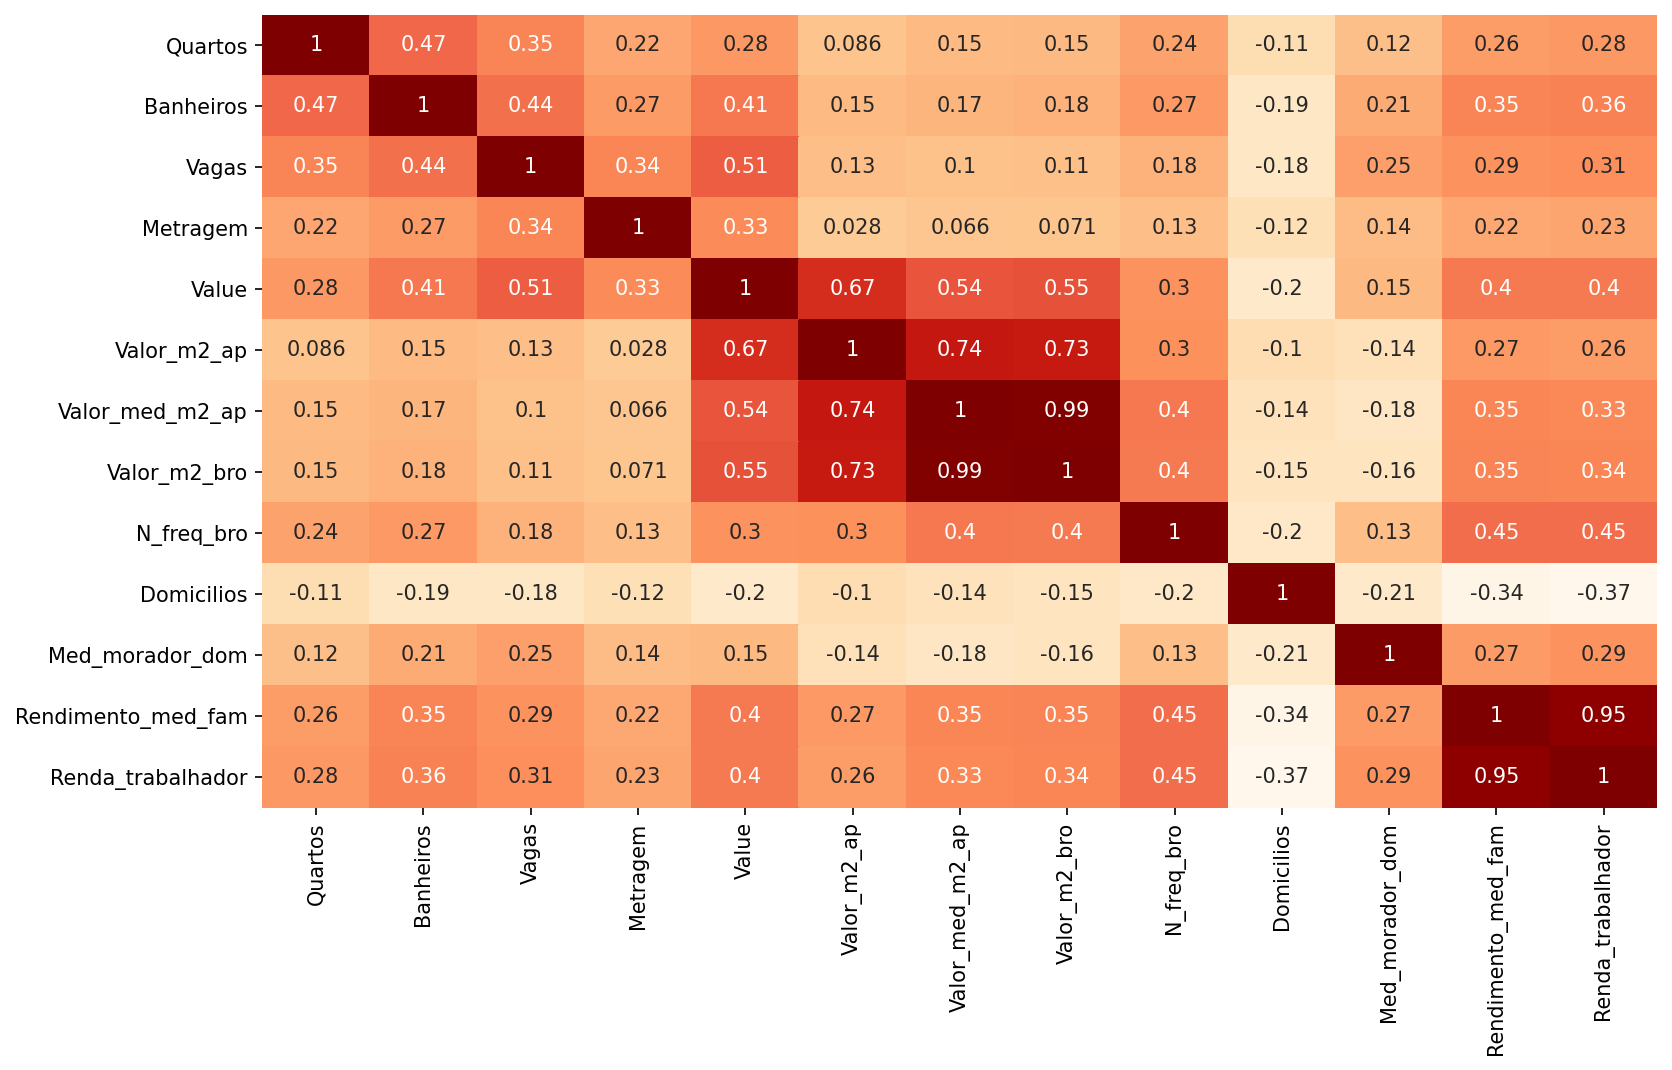

In [111]:
plt.figure(figsize=(12,7),dpi=150)
sns.heatmap(dados_vendas_full[['Quartos','Banheiros', 'Vagas', 'Metragem', 'Value', 'Valor_m2_ap',
                               'Valor_med_m2_ap', 'Valor_m2_bro', 'N_freq_bro','Domicilios', 'Med_morador_dom',
                               'Rendimento_med_fam','Renda_trabalhador']].corr(), 
            annot=True,cbar=False,cmap='OrRd');

# Visualização

In [112]:
geo_df = gpd.GeoDataFrame(dados_vendas_full)

In [113]:
geo_df.head(2)

,setor_censo,Nome_rua,Bairro,Cidade,cep,latitude,longitude,Points,geometry,Quartos,...,Metragem,Value,Valor_m2_ap,Valor_med_m2_ap,Valor_m2_bro,N_freq_bro,Domicilios,Med_morador_dom,Rendimento_med_fam,Renda_trabalhador
0,355030877000067,avenida itacira,Planalto Paulista,São Paulo,4061000.00,-23.62,-46.65,POINT (-46.6481622 -23.6157934),"POLYGON ((-46.64827 -23.61523, -46.64802 -23.6...",4,...,1000,7000000.00,7000.00,6447.72,6327.54,184,164.00,2.66,3158.96,5570.65
1,355030877000067,avenida itacira,Planalto Paulista,São Paulo,4061001.00,-23.62,-46.65,POINT (-46.6481622 -23.6157934),"POLYGON ((-46.64827 -23.61523, -46.64802 -23.6...",4,...,1000,7000000.00,7000.00,6447.72,6327.54,184,164.00,2.66,3158.96,5570.65


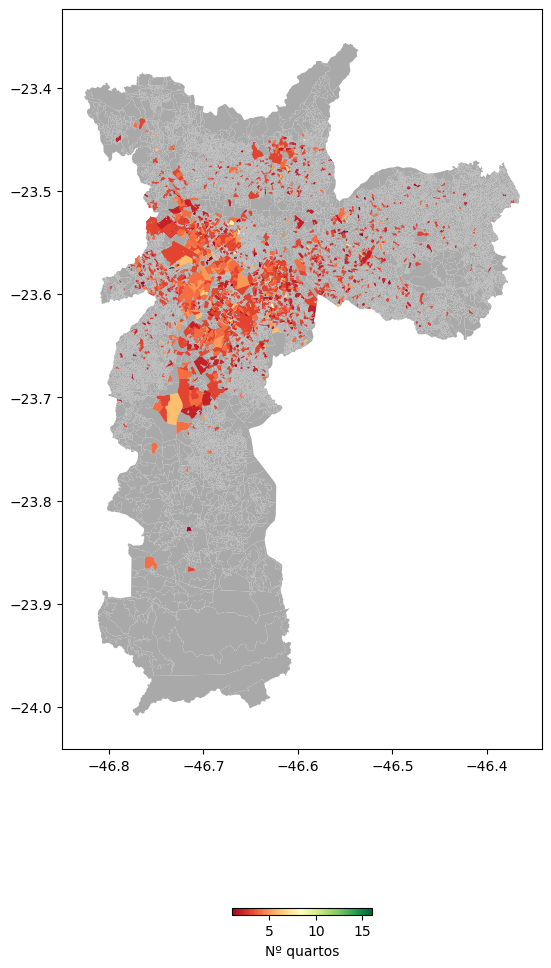

In [114]:
fig, ax = plt.subplots(nrows=1, ncols=1, dpi=100, figsize = (18,14)) 
setor_censo_sp.to_crs(epsg=4326).plot(ax=ax, color='darkgrey') 
geo_df.plot(column = 'Quartos', ax=ax, legend = True, alpha = 1, cmap='RdYlGn',
            legend_kwds={'shrink': 0.1, 
                         'label': "Nº quartos", 
                         'orientation': "horizontal"})
plt.show()

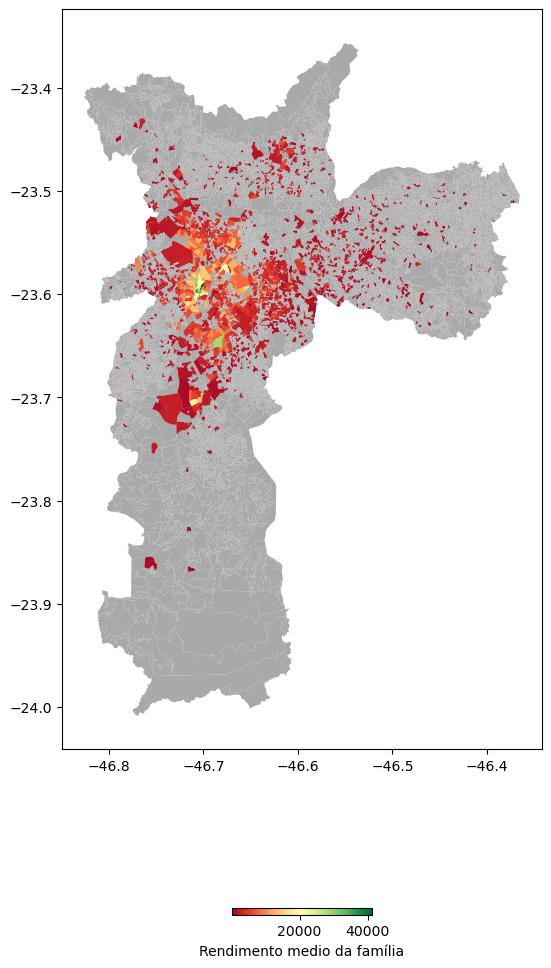

In [115]:
fig, ax = plt.subplots(nrows=1, ncols=1, dpi=100, figsize = (18,14)) 
setor_censo_sp.to_crs(epsg=4326).plot(ax=ax, color='darkgrey') 
geo_df.plot(column = 'Rendimento_med_fam', ax=ax, legend = True, alpha = 1, cmap='RdYlGn',
            legend_kwds={'shrink': 0.1, 
                         'label': "Rendimento medio da família", 
                         'orientation': "horizontal"})
plt.show()

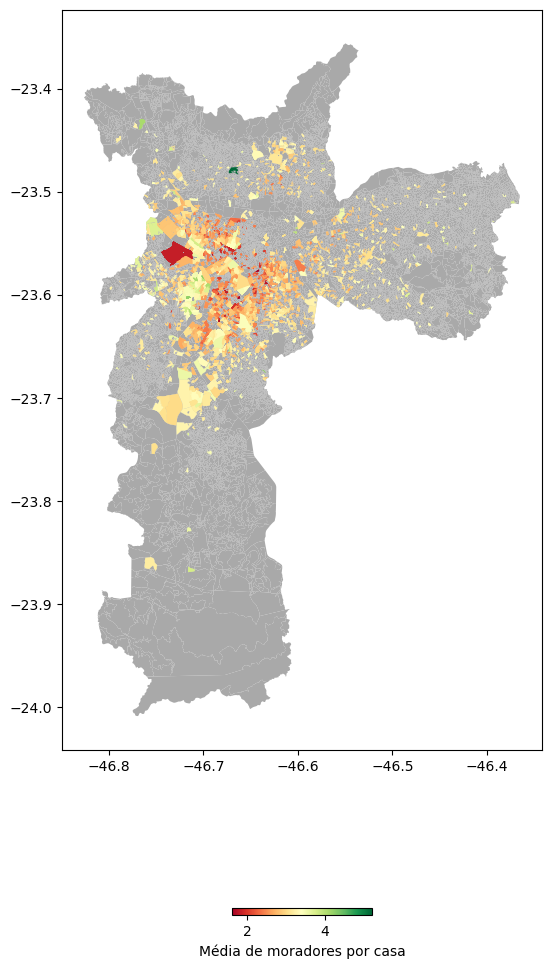

In [116]:
fig, ax = plt.subplots(nrows=1, ncols=1, dpi=100, figsize = (18,14)) 
setor_censo_sp.to_crs(epsg=4326).plot(ax=ax, color='darkgrey') 
geo_df.plot(column = 'Med_morador_dom', ax=ax, legend = True, alpha = 1, cmap='RdYlGn',
            legend_kwds={'shrink': 0.1, 
                         'label': "Média de moradores por casa", 
                         'orientation': "horizontal"})
plt.show()

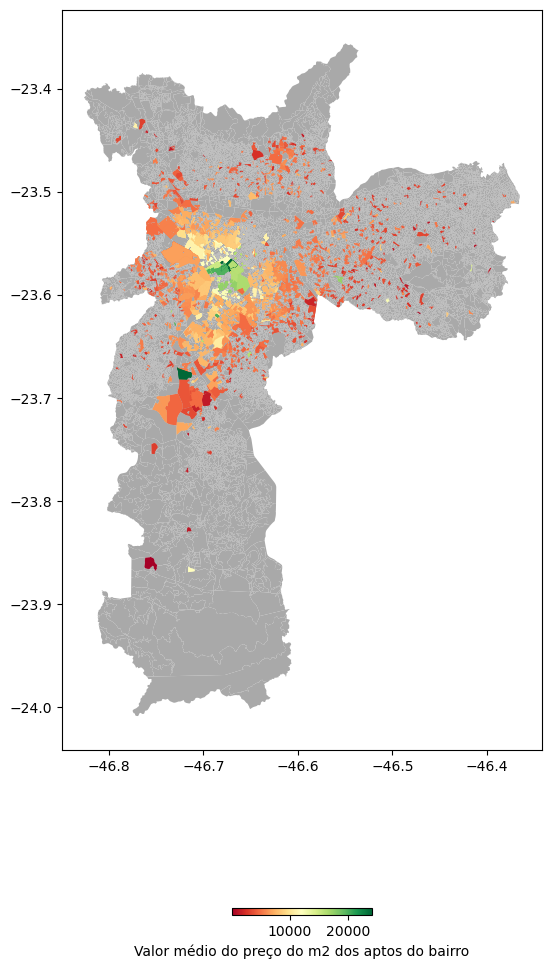

In [117]:
fig, ax = plt.subplots(nrows=1, ncols=1, dpi=100, figsize = (18,14)) 
setor_censo_sp.to_crs(epsg=4326).plot(ax=ax, color='darkgrey') 
geo_df.plot(column = 'Valor_med_m2_ap', ax=ax, legend = True, alpha = 1, cmap='RdYlGn',
            legend_kwds={'shrink': 0.1, 
                         'label': "Valor médio do preço do m2 dos aptos do bairro", 
                         'orientation': "horizontal"})
plt.show()

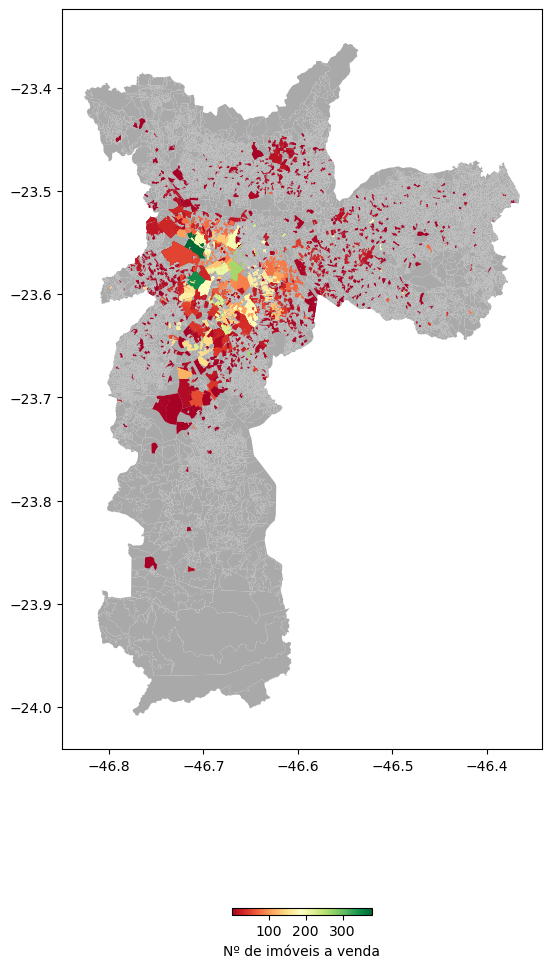

In [118]:
fig, ax = plt.subplots(nrows=1, ncols=1, dpi=100, figsize = (18,14)) 
setor_censo_sp.to_crs(epsg=4326).plot(ax=ax, color='darkgrey') 
geo_df.plot(column = 'N_freq_bro', ax=ax, legend = True, alpha = 1, cmap='RdYlGn',
            legend_kwds={'shrink': 0.1, 
                         'label': "Nº de imóveis a venda", 
                         'orientation': "horizontal"})
plt.show()

# Selecionar variáveis a serem incluídas nos modelos preditivos

In [119]:
dados_vendas_full.columns

Index(['setor_censo', 'Nome_rua', 'Bairro', 'Cidade', 'cep', 'latitude',
       'longitude', 'Points', 'geometry', 'Quartos', 'Banheiros', 'Vagas',
       'Metragem', 'Value', 'Valor_m2_ap', 'Valor_med_m2_ap', 'Valor_m2_bro',
       'N_freq_bro', 'Domicilios', 'Med_morador_dom', 'Rendimento_med_fam',
       'Renda_trabalhador'],
      dtype='object')

In [120]:
dados_pred = dados_vendas_full[['Quartos','Banheiros','Vagas','Metragem','N_freq_bro','Domicilios','Med_morador_dom', 
                                'Value','Valor_m2_bro','Rendimento_med_fam','Renda_trabalhador','latitude','longitude']]

In [121]:
dados_pred.shape

(7725, 13)

In [122]:
dados_pred.head(3)

,Quartos,Banheiros,Vagas,Metragem,N_freq_bro,Domicilios,Med_morador_dom,Value,Valor_m2_bro,Rendimento_med_fam,Renda_trabalhador,latitude,longitude
0,4,8,6,1000,184,164.00,2.66,7000000.00,6327.54,3158.96,5570.65,-23.62,-46.65
1,4,8,6,1000,184,164.00,2.66,7000000.00,6327.54,3158.96,5570.65,-23.62,-46.65
2,4,8,6,1000,184,164.00,2.66,7000000.00,6327.54,3158.96,5570.65,-23.62,-46.65


## Dividir conjunto de treinamento e teste 

In [123]:
X = dados_pred.drop(labels = 'Value', axis=1)

In [124]:
y = dados_pred['Value']

In [125]:
X.head(2)

,Quartos,Banheiros,Vagas,Metragem,N_freq_bro,Domicilios,Med_morador_dom,Valor_m2_bro,Rendimento_med_fam,Renda_trabalhador,latitude,longitude
0,4,8,6,1000,184,164.00,2.66,6327.54,3158.96,5570.65,-23.62,-46.65
1,4,8,6,1000,184,164.00,2.66,6327.54,3158.96,5570.65,-23.62,-46.65


In [126]:
y.head(2)

0   7000000.00
1   7000000.00
Name: Value, dtype: float64

### Usar 70% para treinamento e 30% para teste

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [128]:
X_train.shape, y_train.shape

((5407, 12), (5407,))

In [129]:
X_test.shape, y_test.shape

((2318, 12), (2318,))

# Modelos Preditivos

## Regressão linear

In [130]:
linear_reg = LinearRegression()

In [131]:
linear_reg.fit(X_train, y_train)

LinearRegression()

In [132]:
linear_reg.intercept_, linear_reg.coef_

(149039541.55017468,
 array([-3.94090789e+04,  2.45419601e+05,  4.73881029e+05,  7.22304618e+02,
        -6.59676521e+02, -1.16446128e+02,  7.56841551e+05,  4.44964589e+02,
         3.20852284e+01,  1.44893169e+01, -5.61118542e+04,  3.34984755e+06]))

In [133]:
previsoes_lr = linear_reg.predict(X_test)

In [134]:
round(r2_score(y_test, previsoes_lr), 4)

0.5542

In [135]:
round(mean_absolute_error(y_test, previsoes_lr), 2)

1250562.09

## Regressão Polinomial

In [136]:
poly_features = PolynomialFeatures(degree=3)

In [137]:
X_train_poly = poly_features.fit_transform(X_train)
X_train_poly.shape

(5407, 455)

In [138]:
X_test_poly = poly_features.transform(X_test)
X_test_poly.shape

(2318, 455)

In [139]:
regressor_poly = LinearRegression()

In [140]:
regressor_poly.fit(X_train_poly,y_train)

LinearRegression()

In [141]:
previsoes_poly = regressor_poly.predict(X_test_poly)

In [142]:
round(r2_score(y_test, previsoes_poly), 4)

0.8356

In [143]:
round(mean_absolute_error(y_test, previsoes_poly), 2)

777436.63

## Random Forest

In [144]:
rf_reg = RandomForestRegressor(n_estimators = 100, random_state=123)

In [145]:
rf_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=123)

In [146]:
previsoes_rf = rf_reg.predict(X_test)

In [147]:
round(r2_score(y_test, previsoes_rf), 4)

0.9129

In [148]:
round(mean_absolute_error(y_test, previsoes_rf), 2)

403556.9

## SVM

In [149]:
scaler_X = StandardScaler()
X_train_scale = scaler_X.fit_transform(X_train)

scaler_y = StandardScaler()
y_train_scale = scaler_y.fit_transform(np.array(y_train).reshape(-1,1))

In [150]:
X_test_scale = scaler_X.transform(X_test)
y_test_scale = scaler_y.transform(np.array(y_test).reshape(-1,1))

In [151]:
svr_reg = SVR(kernel='rbf', epsilon=0.1)

In [152]:
svr_reg.fit(X_train_scale, y_train_scale.ravel())

SVR()

In [153]:
previsoes_svr = svr_reg.predict(X_test_scale)

In [154]:
round(r2_score(y_test_scale, previsoes_svr), 4)

0.6737

In [155]:
y_test_inverse = scaler_y.inverse_transform(y_test_scale)
previsoes_svr_inverse = scaler_y.inverse_transform(previsoes_svr)

In [156]:
round(mean_absolute_error(y_test_inverse, previsoes_svr_inverse), 2)

714968.79

## Redes Neurais

In [157]:
X_train_scale.shape, y_train_scale.shape

((5407, 12), (5407, 1))

In [158]:
X_test_scale.shape, y_test_scale.shape

((2318, 12), (2318, 1))

In [159]:
rna_reg = MLPRegressor(max_iter=1000, solver='adam', activation='logistic', hidden_layer_sizes=(75, 75),random_state=123)

In [160]:
rna_reg.fit(X_train_scale, y_train_scale.ravel())

MLPRegressor(activation='logistic', hidden_layer_sizes=(75, 75), max_iter=1000,
             random_state=123)

In [161]:
previsoes_rna = rna_reg.predict(X_test_scale)

In [162]:
previsoes_rna_inverse = scaler_y.inverse_transform(previsoes_rna)

In [163]:
round(r2_score(y_test_scale, previsoes_rna), 4)

0.8397

In [164]:
round(mean_absolute_error(y_test_inverse, previsoes_rna_inverse), 2)

720884.38